# Time Series

## Random Walk Simulation

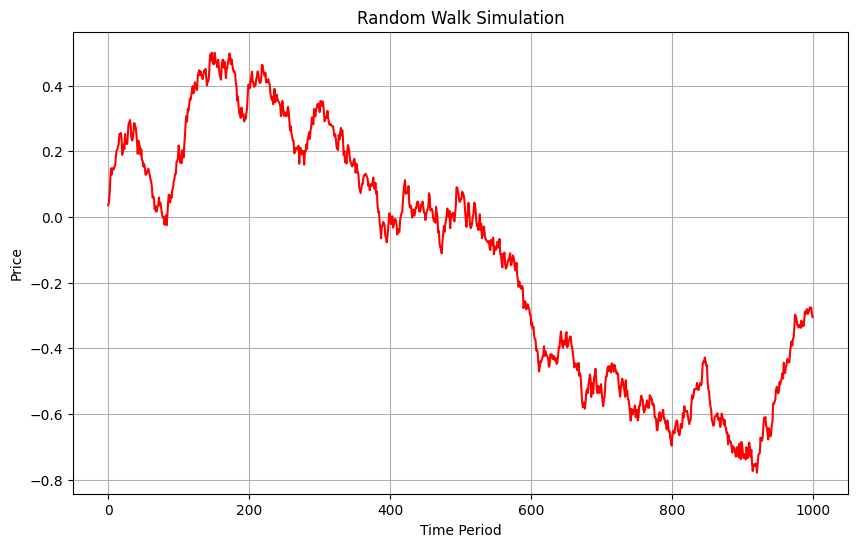

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Setting parameters
np.random.seed(0)
num_periods = 1000
mean_return = 0.0006
std_dev = 0.02

# Simulating random walk
returns = np.random.normal(mean_return, std_dev, num_periods)
prices = np.cumsum(returns)

# Plotting random walk
plt.figure(figsize=(10, 6))
plt.plot(prices, color='red')
plt.title('Random Walk Simulation')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.grid(True)
plt.show()


## Simple Moving Average

In [ ]:
import numpy as np

def generate_log_returns(num_days, mu, sigma):
    np.random.seed(0)
    return np.random.normal(mu, sigma, num_days)

def simple_moving_average(data, window_size):
    sma = np.convolve(data, np.ones(window_size), 'valid') / window_size
    return sma

# Parameters
num_days = 100
mu = 0.001  # mean of the log returns
sigma = 0.02  # standard deviation of the log returns
window_size = 10  # size of the moving average window

# Generate log returns
log_returns = generate_log_returns(num_days, mu, sigma)

# Calculate Simple Moving Average
sma = simple_moving_average(log_returns, window_size)

print("Log Returns:")
print(log_returns)
print("\nSimple Moving Average with window size", window_size, ":")
print(sma)


Log Returns:
[ 0.03628105  0.00900314  0.02057476  0.04581786  0.03835116 -0.01854556
  0.02000177 -0.00202714 -0.00106438  0.00921197  0.00388087  0.03008547
  0.01622075  0.0034335   0.00987726  0.00767349  0.03088158 -0.00310317
  0.00726135 -0.01608191 -0.0500598   0.01407237  0.01828872 -0.0138433
  0.04639509 -0.02808731  0.00191517 -0.00274368  0.03165558  0.03038718
  0.00409895  0.00856325 -0.01675571 -0.03861593 -0.00595824  0.00412698
  0.02560581  0.0250476  -0.00674654 -0.00504606 -0.01997106 -0.02740036
 -0.0331254   0.04001551 -0.00919304 -0.00776149 -0.02405591  0.01654981
 -0.03127796 -0.00325481 -0.01690933  0.00873805 -0.0092161  -0.02261264
  0.00043636  0.00956664  0.00233034  0.00704944 -0.01168644 -0.00625482
 -0.01244921 -0.00619106 -0.01526293 -0.03352565  0.00454852 -0.00703562
 -0.03160397  0.01025565 -0.01714597  0.00203891  0.01558181  0.00357966
  0.02378801 -0.02369652  0.00904683 -0.0126962  -0.01641594 -0.01057699
 -0.00523105  0.00212331 -0.022303    0

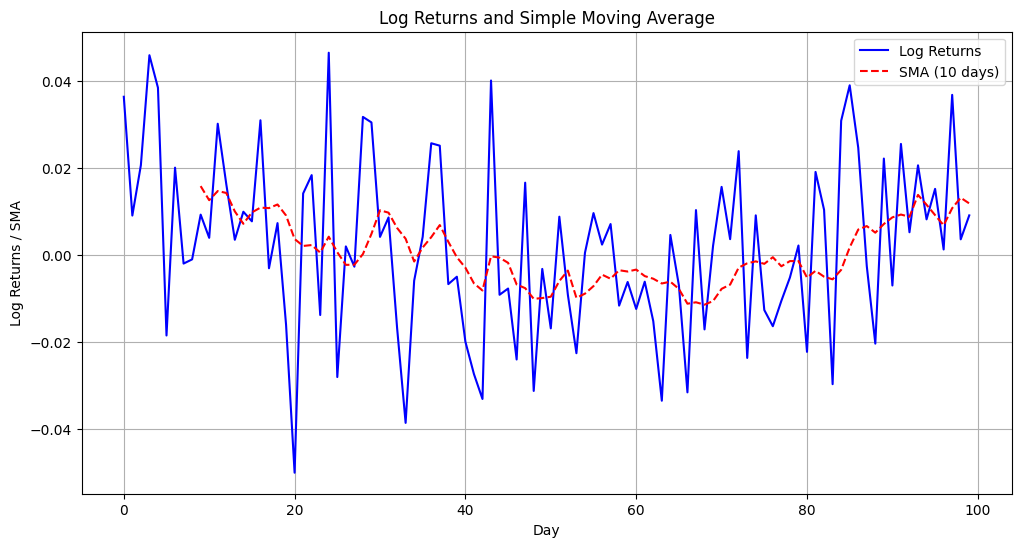

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(log_returns, label='Log Returns', color='blue')
plt.plot(range(window_size - 1, num_days), sma, label=f'SMA ({window_size} days)', color='red', linestyle='--')
plt.title('Log Returns and Simple Moving Average')
plt.xlabel('Day')
plt.ylabel('Log Returns / SMA')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

def convolve(input_array, kernel, mode='full'):
    if mode not in ['full', 'valid', 'same']:
        raise ValueError("Invalid mode. Mode must be one of 'full', 'valid', or 'same'.")

    input_shape = np.array(input_array.shape)
    kernel_shape = np.array(kernel.shape)

    if mode == 'full':
        output_shape = input_shape + kernel_shape - 1
        pad_width = [(kernel_shape[i] - 1, 0) for i in range(len(kernel_shape))]
        padded_input = np.pad(input_array, pad_width, mode='constant')
    elif mode == 'valid':
        output_shape = np.maximum(input_shape - kernel_shape + 1, 0)
        padded_input = input_array
    elif mode == 'same':
        output_shape = input_shape
        pad_width = [(kernel_shape[i] - 1, kernel_shape[i] - 1) for i in range(len(kernel_shape))]
        padded_input = np.pad(input_array, pad_width, mode='constant')

    output_array = np.zeros(output_shape)

    for i in range(output_shape[0]):
        for j in range(output_shape[1]):
            output_array[i, j] = np.sum(padded_input[i:i+kernel_shape[0], j:j+kernel_shape[1]] * kernel)

    return output_array

# Example usage:
input_array = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]])

kernel = np.array([[1, 0],
                   [0, 1]])

print("Input Array:")
print(input_array)

print("\nKernel:")
print(kernel)

print("\nConvolution (Full):")
print(convolve(input_array, kernel, mode='full'))

print("\nConvolution (Valid):")
print(convolve(input_array, kernel, mode='valid'))

print("\nConvolution (Same):")
print(convolve(input_array, kernel, mode='same'))


Input Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Kernel:
[[1 0]
 [0 1]]

Convolution (Full):
[[ 1.  2.  3.  3.]
 [ 4.  6.  8.  9.]
 [ 7. 12. 14. 15.]
 [ 7. 15. 17. 18.]]

Convolution (Valid):
[[ 6.  8.]
 [12. 14.]]

Convolution (Same):
[[ 1.  2.  3.]
 [ 4.  6.  8.]
 [ 7. 12. 14.]]


## Exponentially-Weighted Moving Average

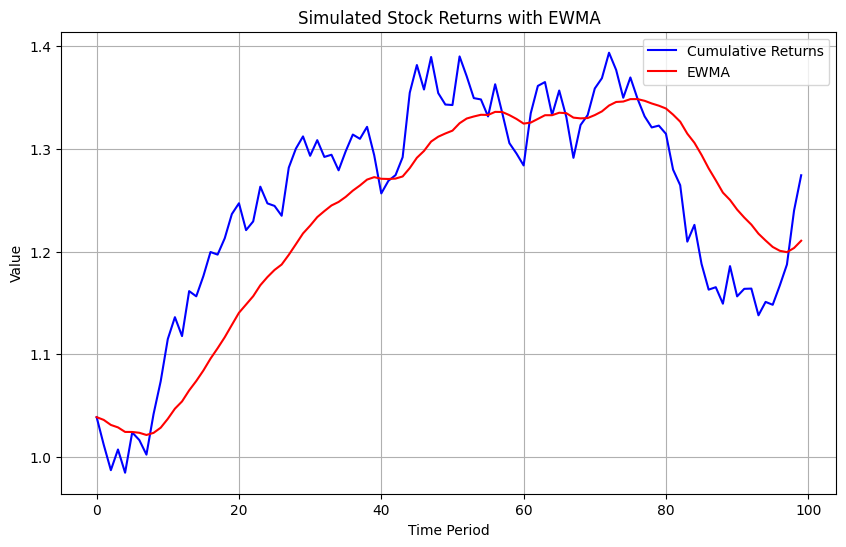

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_periods = 100
mu = 0.001  # average return
sigma = 0.02  # volatility
alpha = 0.1  # smoothing factor for EWMA

# Generate random stock returns
returns = np.random.normal(mu, sigma, num_periods)

# Calculate cumulative returns (random walk)
cumulative_returns = np.cumprod(1 + returns)  # Cumulative product of (1 + returns)

# Apply Exponentially Weighted Moving Average (EWMA)
ewma = np.zeros_like(cumulative_returns)
ewma[0] = cumulative_returns[0]  # Initial value is the same as the first observation

for t in range(1, len(cumulative_returns)):
    ewma[t] = (1 - alpha) * ewma[t - 1] + alpha * cumulative_returns[t]

# Plot the simulated returns and EWMA
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, color='blue', label='Cumulative Returns')
plt.plot(ewma, color='red', label='EWMA')
plt.title('Simulated Stock Returns with EWMA')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Holt's Linear Trend Model

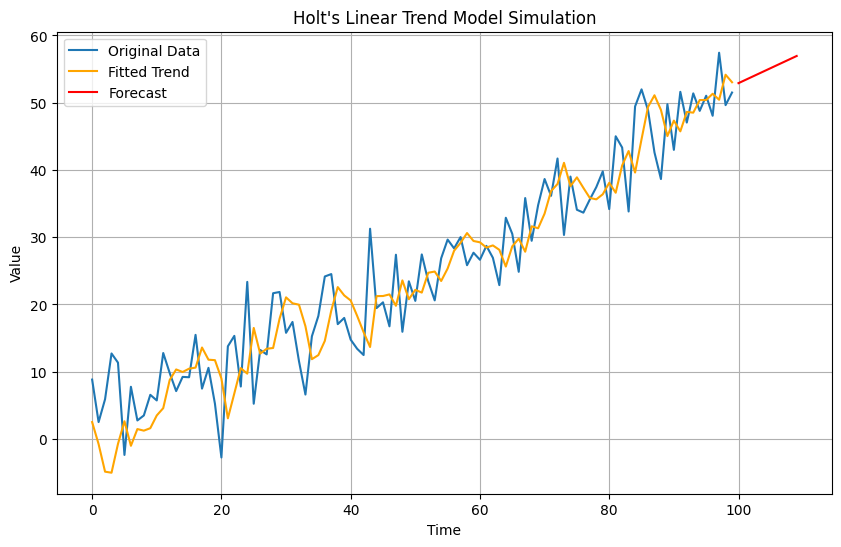

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# Set random seed for reproducibility
np.random.seed(0)

# Generate time series data with trend
n_obs = 100
time = np.arange(n_obs)
trend = 0.5 * time  # Simulated linear trend
noise = np.random.normal(loc=0, scale=5, size=n_obs)  # Simulated noise
data = trend + noise

# Fit Holt's linear trend model
model = Holt(data)
fit = model.fit()

# Forecast future values
forecast_values = fit.forecast(steps=10)

# Plot the original data, fitted trend, and forecast
plt.figure(figsize=(10, 6))
plt.plot(time, data, label='Original Data')
plt.plot(time, fit.fittedvalues, color='orange', label='Fitted Trend')
plt.plot(np.arange(n_obs, n_obs + 10), forecast_values, color='red', label='Forecast')
plt.title("Holt's Linear Trend Model Simulation")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Holt-Winters

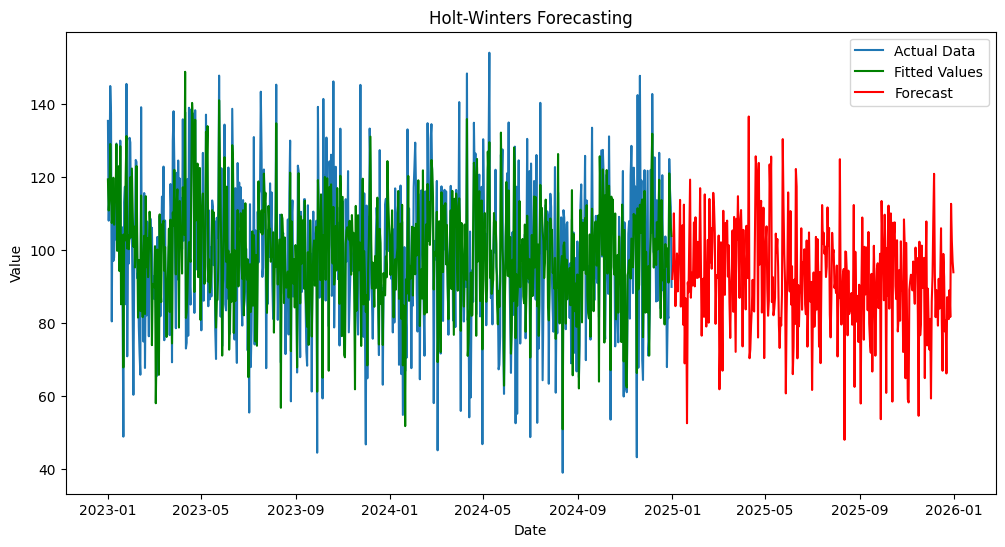

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate some sample data
np.random.seed(0)
index = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')
data = np.random.normal(loc=100, scale=20, size=len(index))
ts_data = pd.Series(data, index=index)

# Perform Holt-Winters forecasting
model = ExponentialSmoothing(ts_data, trend='add', seasonal='add', seasonal_periods=365)
fit_model = model.fit()

# Forecast for the next year
forecast = fit_model.forecast(steps=365)

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Actual Data')
plt.plot(fit_model.fittedvalues, label='Fitted Values', color='green')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## ARIMA

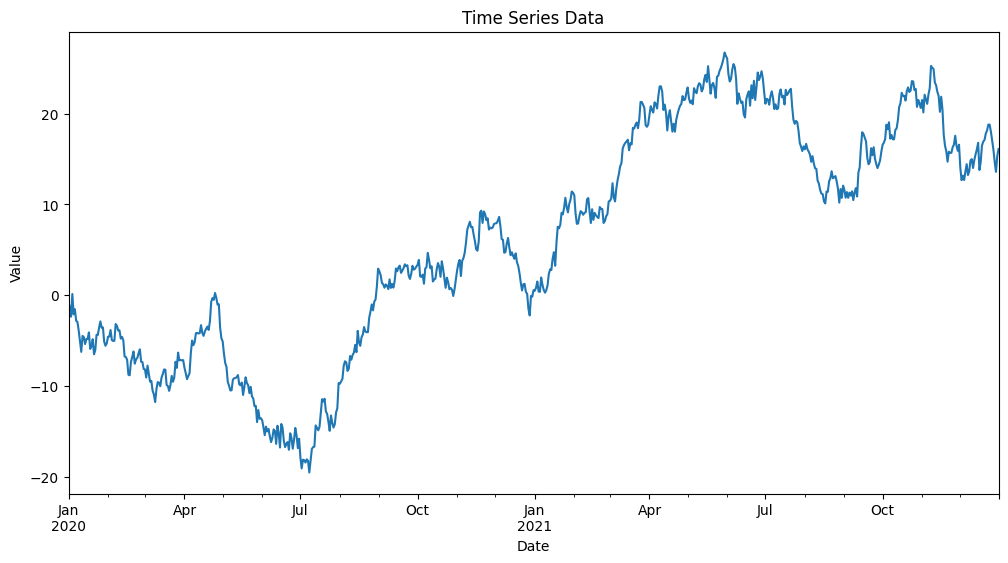

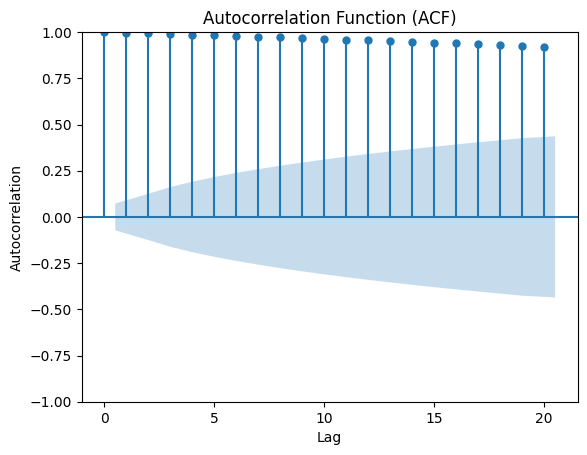

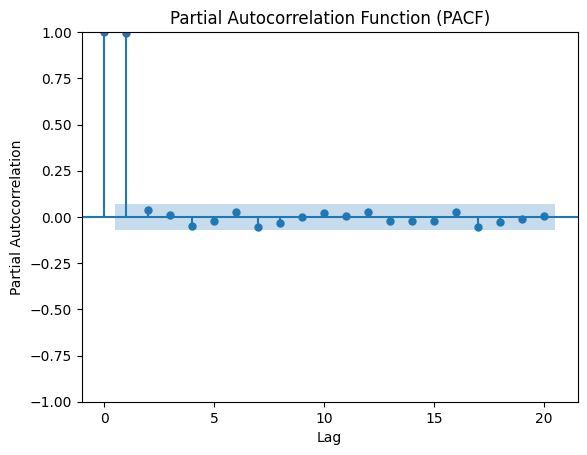

/home/al/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/al/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/al/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  731
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1010.232
Date:                Thu, 08 Feb 2024   AIC                           2026.463
Time:                        11:12:29   BIC                           2040.243
Sample:                    01-01-2020   HQIC                          2031.780
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0283      0.920     -0.031      0.975      -1.832       1.775
ma.L1         -0.0124      0.924     -0.013      0.989      -1.823       1.798
sigma2         0.9323      0.048     19.245      0.0

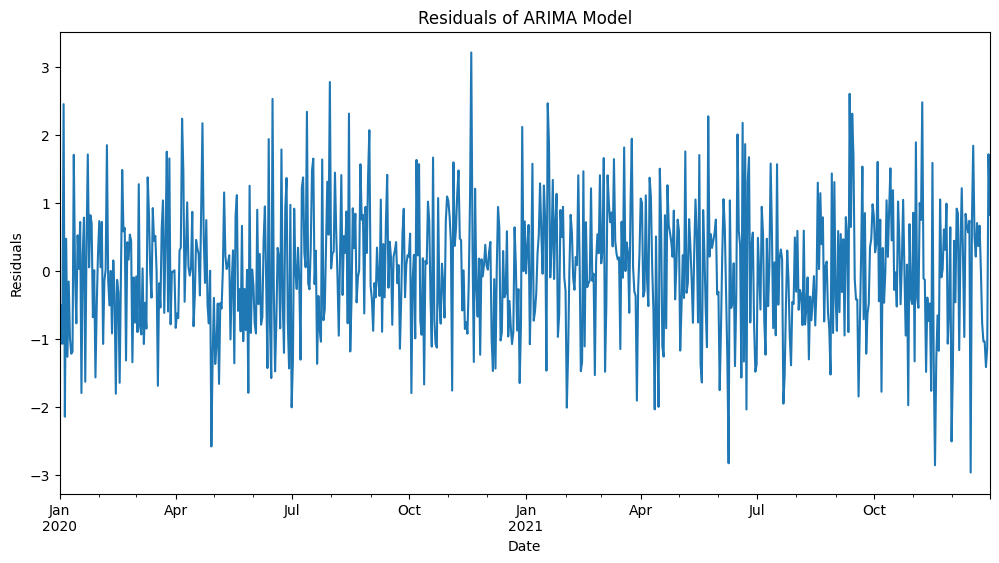

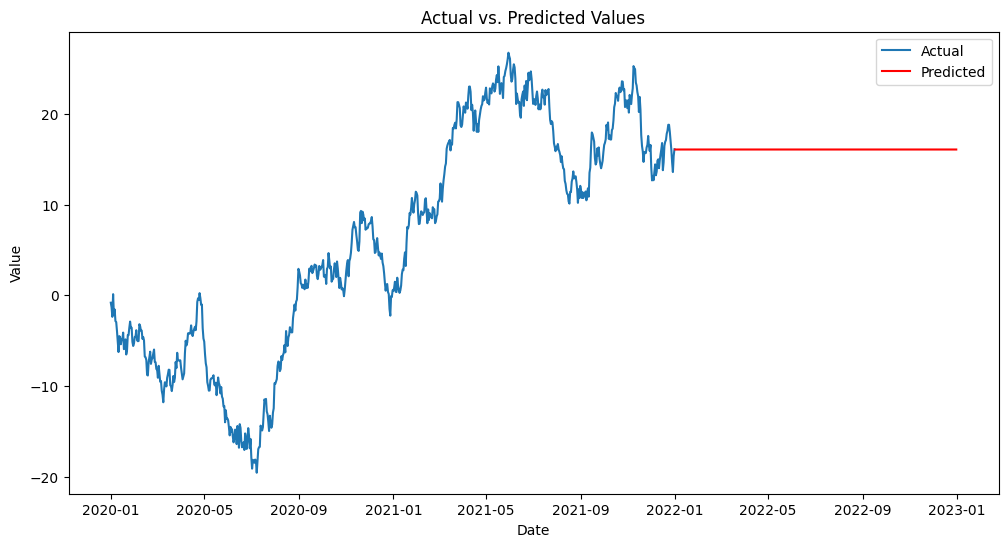

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate or load your time series data
# For example, you can load data from a CSV file or generate synthetic data

# Assuming you have a pandas DataFrame with a 'date' index and a 'value' column
# For demonstration purposes, let's create a synthetic time series
date_range = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')
values = np.random.randn(len(date_range)).cumsum()
data = pd.DataFrame({'date': date_range, 'value': values})
data.set_index('date', inplace=True)

# Visualize the time series
data['value'].plot(figsize=(12, 6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Plot ACF and PACF to determine ARIMA parameters
plot_acf(data['value'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_pacf(data['value'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Fit ARIMA model
# Determine the appropriate values for p, d, and q based on ACF and PACF plots
p = 1  # AR order
d = 1  # differencing
q = 1  # MA order

# Instantiate and fit the ARIMA model
model = ARIMA(data['value'], order=(p, d, q))
results = model.fit()

# Summary of the model
print(results.summary())

# Plot residuals
residuals = pd.Series(results.resid)
residuals.plot(figsize=(12, 6))
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Make predictions
start_date = '2022-01-01'
end_date = '2022-12-31'
forecast = results.predict(start=start_date, end=end_date, dynamic=True)

# Visualize actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='Actual')
plt.plot(forecast, color='red', label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
